In [1]:
# 데이터프레임으로 숫자의 모양을 파악하기 위해 데이터프레임 디스플레이 옵션 설정
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# mnist 데이터 불러오기
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

- DESCR : 데이터셋 설명
- 'target'키 : 레이블 배열을 담고 있음
- 'data'키 : 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열

In [4]:
# train data와 label 데이터로 나눠줌
X, y = mnist['data'], mnist['target']

In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


- 이미지가 70,000개 있고 각 이미지에는 784(28*28픽셀)개의 특성이 있음
- 개개의 특성은 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타냄

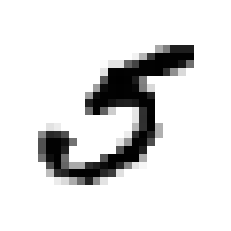

In [6]:
# 데이터셋에서 이미지 확인해보기
# 샘플의 특성 벡터를 추출해서 28*28 배열로 크기를 바꾸고
# matplotlib의 imshow() 함수를 사용한다.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
# 5처럼 보이는데 5가 맞는지 실제 레이블 확인해보기
y[36000]

5.0

In [8]:
# 데이터프레임으로도 찍어보기
pd.DataFrame(some_digit_image)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,131,225,225,225,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,73,197,253,252,252,252,252,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,154,187,252,252,253,252,252,233,145,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,29,252,253,252,252,252,252,253,204,112,37,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,169,253,255,253,228,126,0,0,0,0,0,0,0,0,0,0


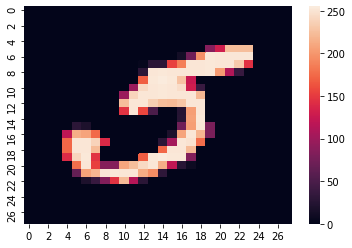

In [9]:
# 히트맵
import seaborn as sns
sns.heatmap(some_digit_image)

In [10]:
# MNIST 데이터셋은 이미 train set(앞쪽 60000개의 이미지), test set(뒤쪽 10000개의 이미지)으로 나누어져 있다.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# train set을 섞어준다. -> 모든 교차 검증 폴드가 비슷해지도록
# 어떤 알고리즘은 훈련 샘플의 순서에 민감해서 비슷한 샘플이 연이어 나타나면 성능이 나빠진다.
# 데이터셋을 섞으면 이런 문제를 방지할 수 있다.
# 시계열 데이터를 다룰 때에는 섞는 것이 좋지 않다.
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train , y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
# 5만 식별해보기 (5-감지기 : 5와 5아님 두 개의 클래스를 구분)
# 이진분류기(binary classifier)
y_train_5 = (y_train == 5) # 5는 True, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

In [13]:
# 사이킷런의 SGDClassifier 사용해서 훈련시키기
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42) # 결과를 재현하기 위해 random_state 지정
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

- SGDClassifier가 이 이미지는 5가 true라고 예측했다.

In [15]:
# 간단하게 Decision Tree로 예측해보기
from sklearn import tree
from sklearn import metrics

dt_clf = tree.DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)
prediction = dt_clf.predict(X_test)
print(prediction[20:30])
print(y_test[20:30])
print(metrics.accuracy_score(y_test, prediction))

[0. 0. 0. 0. 0. 0. 0. 5. 0. 6.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8755


In [16]:
# Random Forest로 예측해보기
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
prediction = rf_clf.predict(X_test)
print(prediction[20:30])
print(y_test[20:30])
print(metrics.accuracy_score(y_test, prediction))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.9492
